In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fruits=pd.read_csv("fruit_data_with_colors.txt",sep="\t",encoding = "ISO-8859-1",engine="python")

In [ ]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
target_fruits_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
target_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
X = fruits[['mass', 'width', 'height']]
#y is the target variable
y = fruits['fruit_label']

### Use train_test_split function to break the data into default 75/25 % train and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

### We then need to create an instance of the classifier object.
- In this case a k-NN classifier set the important parameter (in this case the number of neighbors means k)
- To a specific value(we’re taking 5) to be used by the classifier. Take n_neighbors or k = 5.

0.6666666666666666


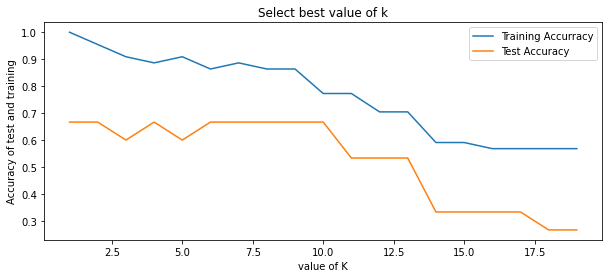

In [ ]:
k = range(1,20)
trainingAccuracy = []
testAccuracy=[]

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    trainingacc = knn.score(x_train_scaled,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(x_test_scaled,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("value of K")
plt.ylabel("Accuracy of test and training")
plt.title("Select best value of k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
  #axes[0].legend(['loss','val_loss'])
axes.legend(["Training Accurracy","Test Accuracy"])
print(max(testAccuracy)) # with K value as 4

Text(0, 0.5, 'Error Rate')

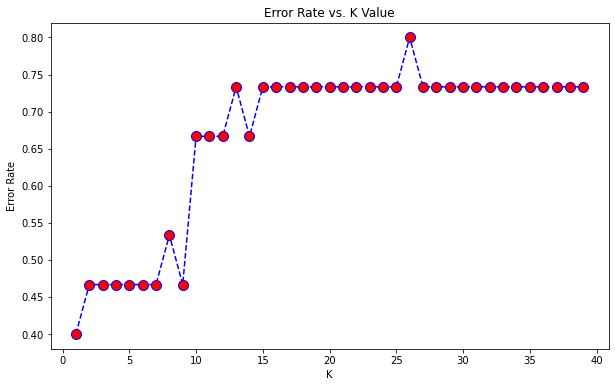

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]


              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         1
           3       0.75      0.38      0.50         8
           4       0.25      0.50      0.33         2

    accuracy                           0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15



In [ ]:
# From the above it is quiet evident that when K=4 we get better result

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train_scaled,y_train)

knn.score(x_test_scaled,y_test)

0.6666666666666666

In [ ]:
# now if we try to predic the fruit based on it's mass width and height
# for example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20,4.3,5.5]])
target_fruits_name[fruit_prediction[0]]

# Another example
fruit_prediction = knn.predict([[180,8.0,6.8]])
target_fruits_name[fruit_prediction[0]]


'orange'